In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
xs = np.linspace(-5, 7)
ys = 3 * xs + norm(5, 2).rvs(50)

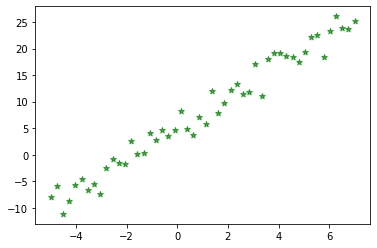

In [3]:
# wx + b
# 3x + 5
plt.scatter(xs, ys, color='green', marker='*', alpha=0.7);

In [4]:
# forward pass/propagation - takes an X and returns a Y_hat

In [5]:
def forward(w, x, b):
    # y_hat
    return (w * x) + b

In [6]:
def loss(y, y_hat):
    return ((y - y_hat) ** 2).mean()

In [7]:
list(zip(xs, ys))[:5]

[(-5.0, -8.046410295637108),
 (-4.755102040816326, -5.919077401580553),
 (-4.510204081632653, -11.144447873837999),
 (-4.26530612244898, -8.775173122124787),
 (-4.020408163265306, -5.798100061942672)]

In [8]:
# forward(0, -5, 0)
# loss(-14.24, 0)

In [9]:
y_hats = forward(2.98, xs, 4.0)

In [10]:
loss(ys, y_hats)

4.768477863755557

In [11]:
def slope_w(xs, ys, yhs):
    return (-xs * (ys - yhs)).mean()
def slope_b(xs, ys, yhs):
    return (-1* (ys - yhs)).mean()

In [12]:
mses = np.zeros(11)
for i, w in enumerate(range(-3,8)):
    y_hats = forward(w, xs, 5.0)
    mse = loss(ys, y_hats)
    mses[i] = mse

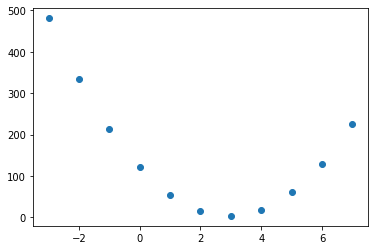

In [13]:
plt.scatter(range(-3, 8), mses);

In [14]:
y_hats = forward(0.1, xs, 5.0)

In [15]:
slope_w(xs, ys, y_hats) * -1 * 0.01

0.38452564475662276

In [16]:
y_hats = forward(0.1 + 0.396, xs, 5.0)

In [17]:
slope_w(xs, ys, y_hats) * -1 * 0.05

1.6555302645994407

In [18]:
y_hats = forward(0.1 + 0.396 + 1.715, xs, 5.0)

In [19]:
slope_w(xs, ys, y_hats)

-9.975605291988806

In [20]:
y_hats = forward(3, xs, 5.0)

In [21]:
slope_w(xs, ys, y_hats)

0.6678436876030261

In [22]:
w = 0.1 # real is 3
b = 0.1 # real is 5
epochs = 500
lr = 0.01
losses = np.zeros(epochs)
for e in range(epochs):
    yh = forward(w, xs, b)
    mse = loss(ys, yh)
    losses[e] = mse
    sw = slope_w(xs, ys, yh) * lr
    sb = slope_b(xs, ys, yh) * lr
    w -= sw
    b -= sb
w, b

(2.9446495827310324, 5.082253737463283)

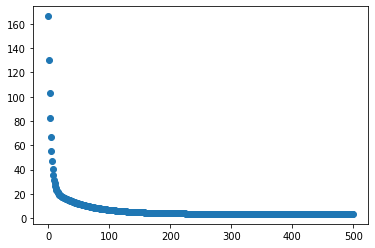

In [23]:
plt.scatter(range(epochs), losses);

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [25]:
model = Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(1,), name='Layer1'))
model.compile(loss='mse', optimizer=SGD())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(xs, ys, epochs=10, verbose=1)

Train on 50 samples
Epoch 1/10
50/50 [==============================] - 0s 6ms/sample - loss: 99.4704
Epoch 2/10
50/50 [==============================] - 0s 63us/sample - loss: 42.6096
Epoch 3/10
50/50 [==============================] - 0s 80us/sample - loss: 27.5704
Epoch 4/10
50/50 [==============================] - 0s 62us/sample - loss: 22.6341
Epoch 5/10
50/50 [==============================] - 0s 224us/sample - loss: 20.2633
Epoch 6/10
50/50 [==============================] - 0s 139us/sample - loss: 18.8544
Epoch 7/10
50/50 [==============================] - 0s 80us/sample - loss: 17.6850
Epoch 8/10
50/50 [==============================] - 0s 358us/sample - loss: 16.5962
Epoch 9/10
50/50 [==============================] - 0s 91us/sample - loss: 15.7351
Epoch 10/10
50/50 [==============================] - 0s 108us/sample - loss: 14.8382


# POST WORK

---

In [27]:
model.get_weights()

[array([[3.2227216]], dtype=float32), array([1.7447395], dtype=float32)]

In [28]:
model.weights

[<tf.Variable 'Layer1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[3.2227216]], dtype=float32)>,
 <tf.Variable 'Layer1/bias:0' shape=(1,) dtype=float32, numpy=array([1.7447395], dtype=float32)>]

In [29]:
model.weights[0].numpy()[0][0]

3.2227216

In [30]:
model.weights[1].numpy()[0]

1.7447395

In [31]:
from tensorflow.keras.utils import plot_model

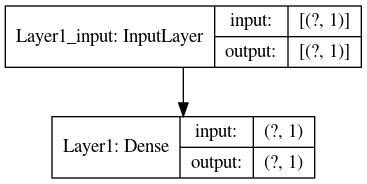

In [32]:
plot_model(model, to_file='image.png', show_shapes=True)

In [33]:
# ! pip install pydot-ng

In [34]:
# ! pip install graphviz

In [35]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': 2,
 'samples': 50,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss']}

In [36]:
history.model, model

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7eff05375410>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x7eff05375410>)

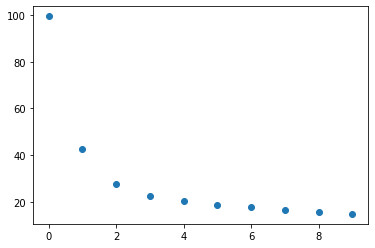

In [37]:
plt.scatter(history.epoch, history.history['loss']);

In [38]:
model.predict(xs[:5])

array([[-14.368868],
       [-13.579631],
       [-12.790393],
       [-12.001154],
       [-11.211917]], dtype=float32)

In [39]:
ys[:5]

array([ -8.0464103 ,  -5.9190774 , -11.14444787,  -8.77517312,
        -5.79810006])

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(ys, model.predict(xs))

0.8729314837238168

# TCBMI

---

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('tc_bmi.csv')
df.head()

ID     TC   BMI BMI_cat  Obese
0   1  158.0  20.2  Normal      0
1   2  181.0  21.7  Normal      0
2   3  192.0  22.0  Normal      0
3   4  164.0  22.8  Normal      0
4   5  201.5  24.6  Normal      0

In [44]:
x = df.TC.values
y = df.BMI.values

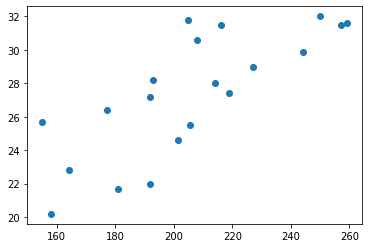

In [45]:
plt.scatter(x, y);

In [46]:
sgd = SGD(learning_rate=0.00001)
sgd.get_config()

{'name': 'SGD',
 'learning_rate': 1e-05,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [47]:
model = Sequential()
model.add(Dense(units=3, activation='linear', input_shape=(1,), name='Layer1'))
model.add(Dense(units=1, activation='linear', name='Layer2'))
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 3)                 6         
_________________________________________________________________
Layer2 (Dense)               (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


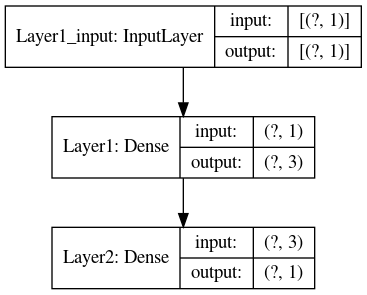

In [48]:
plot_model(model, to_file='image.png', show_shapes=True)

In [49]:
history = model.fit(x, y, epochs=10, verbose=1, validation_split=0.3, shuffle=True)

Train on 14 samples, validate on 6 samples
Epoch 1/10
14/14 [==============================] - 0s 23ms/sample - loss: 5090.5415 - val_loss: 168.7602
Epoch 2/10
14/14 [==============================] - 0s 614us/sample - loss: 132.8521 - val_loss: 13.1924
Epoch 3/10
14/14 [==============================] - 0s 577us/sample - loss: 6.8682 - val_loss: 9.3432
Epoch 4/10
14/14 [==============================] - 0s 982us/sample - loss: 5.7035 - val_loss: 9.5073
Epoch 5/10
14/14 [==============================] - 0s 2ms/sample - loss: 5.6962 - val_loss: 9.4932
Epoch 6/10
14/14 [==============================] - 0s 712us/sample - loss: 5.6961 - val_loss: 9.4943
Epoch 7/10
14/14 [==============================] - 0s 1ms/sample - loss: 5.6961 - val_loss: 9.4942
Epoch 8/10
14/14 [==============================] - 0s 910us/sample - loss: 5.6961 - val_loss: 9.4942
Epoch 9/10
14/14 [==============================] - 0s 720us/sample - loss: 5.6961 - val_loss: 9.4942
Epoch 10/10
14/14 [=================

In [50]:
history.history

{'loss': [5090.54150390625,
  132.85208129882812,
  6.868171215057373,
  5.703503131866455,
  5.696173667907715,
  5.69612455368042,
  5.6961236000061035,
  5.696115016937256,
  5.69611120223999,
  5.696113109588623],
 'val_loss': [168.76023864746094,
  13.192405700683594,
  9.343214988708496,
  9.50727367401123,
  9.493168830871582,
  9.494288444519043,
  9.494187355041504,
  9.494193077087402,
  9.494176864624023,
  9.494187355041504]}

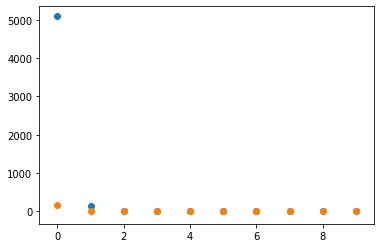

In [51]:
plt.scatter(history.epoch, history.history['loss'])
plt.scatter(history.epoch, history.history['val_loss'])

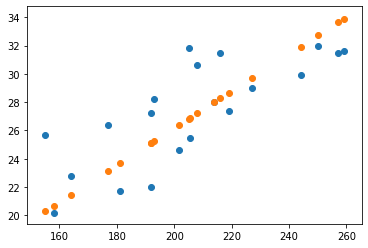

In [52]:
plt.scatter(x,y)
plt.scatter(x, model.predict(x));

In [53]:
r2_score(y, model.predict(x))

0.47790854235076463

# LOAN REGRESSION

---

In [81]:
df = pd.read_csv('loan.csv')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 6 to 2497
Data columns (total 5 columns):
Interest.Rate     2492 non-null float64
FICO.Score        2492 non-null float64
Loan.Length       2492 non-null int64
Monthly.Income    2492 non-null float64
Loan.Amount       2492 non-null int64
dtypes: float64(3), int64(2)
memory usage: 116.8 KB


In [82]:
df.head()

Interest.Rate  FICO.Score  Loan.Length  Monthly.Income  Loan.Amount
6           15.31       670.0           36         4891.67         6000
11          19.72       670.0           36         3575.00         2000
12          14.27       665.0           36         4250.00        10625
13          21.67       670.0           60        14166.67        28000
21          21.98       665.0           36         6666.67        22000

In [83]:
y = df['Interest.Rate'].values
y[:3]

array([15.31, 19.72, 14.27])

In [91]:
X = df.iloc[:,1:].values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[:3]

array([[-1.02516365, -0.53093597, -0.20164113, -0.82236888],
       [-1.02516365, -0.53093597, -0.53362523, -1.33477595],
       [-1.16814036, -0.53093597, -0.36343128, -0.22989821]])

In [92]:
sgd = SGD(learning_rate=0.00001)
sgd.get_config()

{'name': 'SGD',
 'learning_rate': 1e-05,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [93]:
model = Sequential()
model.add(Dense(units=3, activation='linear', input_shape=(4,), name='Layer1'))
model.add(Dense(units=1, activation='linear', name='Layer2'))
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 3)                 15        
_________________________________________________________________
Layer2 (Dense)               (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


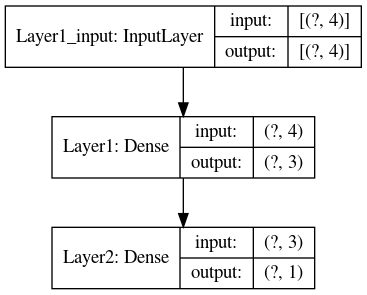

In [94]:
plot_model(model, to_file='image.png', show_shapes=True)

In [97]:
history = model.fit(X, y, epochs=100, verbose=0, validation_split=0.3, shuffle=True)

In [98]:
# plot epoch vs loss

In [101]:
# lets do this as a classification problem too < 9%

In [102]:
# also titanic, get dataset

In [104]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [106]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [107]:
train_labels.shape

(60000,)

In [108]:
train_images.shape

(60000, 28, 28)

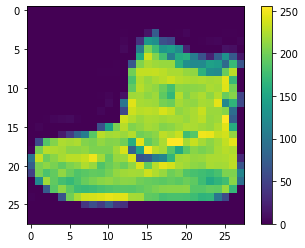

In [109]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [110]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [111]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

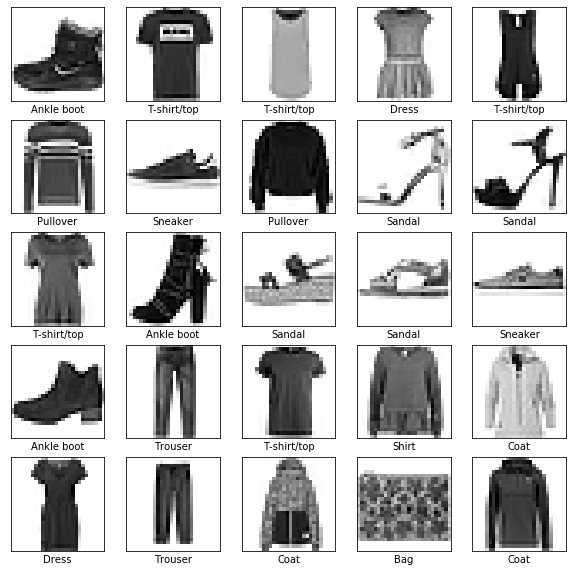

In [112]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [114]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


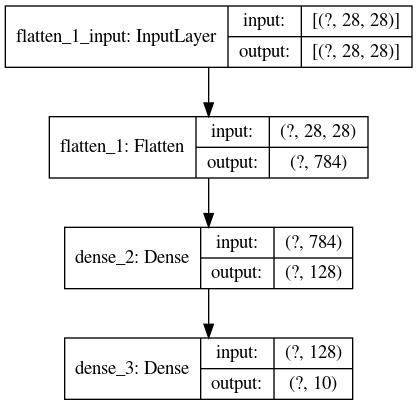

In [115]:
plot_model(model, to_file='image.png', show_shapes=True)

In [116]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [118]:
model.fit(train_images, train_labels, epochs=2, validation_split=0.3, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 3s 67us/sample - loss: 0.2249 - accuracy: 0.9155 - val_loss: 0.2372 - val_accuracy: 0.9130
Epoch 2/2
42000/42000 [==============================] - 3s 61us/sample - loss: 0.2193 - accuracy: 0.9179 - val_loss: 0.2518 - val_accuracy: 0.9047


In [119]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2579 - accuracy: 0.8795

Test accuracy: 0.8795


In [120]:
predictions = model.predict(test_images)

In [121]:
predictions[0]

array([2.4623755e-08, 1.0933963e-11, 6.2713729e-10, 2.3875437e-09,
       2.7860452e-09, 6.7951783e-05, 2.3581467e-07, 2.2942051e-03,
       3.9451002e-08, 9.9763763e-01], dtype=float32)

In [122]:
np.argmax(predictions[0])

9

In [123]:
test_labels[0]

9

In [124]:
# do mnist data